# Bioimage Model Zoo and BioImageArchive integration example notebook

This notebook shows how to benchmark with models from the [BioImage Model Zoo](https://bioimage.io) using reference datasets from the [BioImage Archive](https://www.ebi.ac.uk/bioimage-archive/)

### 1. Import necessary dependencies

In [10]:
from bia_bmz_integration import process

### 2. Input BMZ model to benchmark

Let's look at the performance of [this model](https://bioimage.io/#/?type=model&tags=noisy-fish&id=10.5281%2Fzenodo.7772662) to segment cell nuclei in 3D. The model is a Unet trained on confocal images of Arabidopsis Ovules nuclei stain with BCEDiceLoss.

In [11]:
bmz_model = "noisy-fish"

### 3. Input reference image from the BIA

We will test its performance on [S-BIAD1026](https://www.ebi.ac.uk/biostudies/bioimages/studies/S-BIAD1026). A dataset that contains annotated 3D images of Arabidopsis Ovules 

In [12]:
ome_zarr_uri = "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_H2BtdTomato.ome.zarr/0"


### 4. Input corresponding reference annotation

We need the corresponding segentation mask to benchmark

In [13]:
reference_annotations = "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_stain_StarDist_goldGT_180_rotation.ome.zarr/0"

### 5. Run benchmarking

We are going to run the model on a few z planes to speed things up. The relevant metrics here are IoU and Dice that allow us to evaluate the accuracy of the segmentation. The IoU and Dice scores vary from zero to 1, with 1 denoting the most similarity between the model's prediction and the reference annotation.

2024-09-25 10:16:37.377 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading noisy-fish from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/noisy-fish/1/files/rdf.yaml


IoU score: tensor([[0.6891]])
Dice score: tensor([[0.8160]])
PSNR score reconstructed image: tensor([[12.8442]])
RMSE score reconstructed image: tensor([[260.9742]])
SSIM score reconstructed image: tensor([[0.8778]])


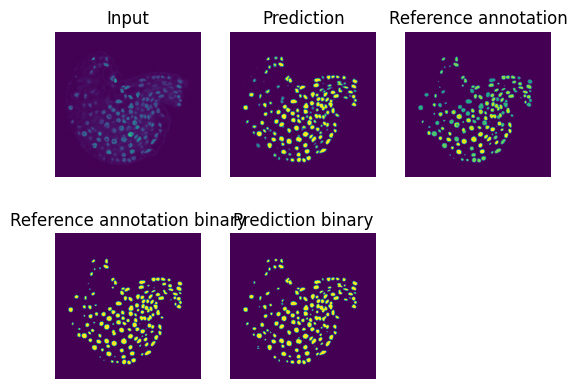

In [14]:
process(bmz_model, ome_zarr_uri, reference_annotations, z_slices=[170, 180])

### 6. Benchmark another model and compare

Let's look at the performance of another model segmenting the smae dataset. [This model](https://bioimage.io/#/?id=10.5281%2Fzenodo.6383429&type=model&tags=loyal-squid) is 3D U-Net trained to predict the nuclei and their boundaries in fixed confocal images of developing mouse embryo.

In [15]:
bmz_model = "loyal-squid"

2024-09-25 10:17:34.612 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading loyal-squid from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/loyal-squid/1/files/rdf.yaml


IoU score: tensor([[0.3510]])
Dice score: tensor([[0.5196]])
PSNR score reconstructed image: tensor([[12.8405]])
RMSE score reconstructed image: tensor([[261.0829]])
SSIM score reconstructed image: tensor([[0.8777]])


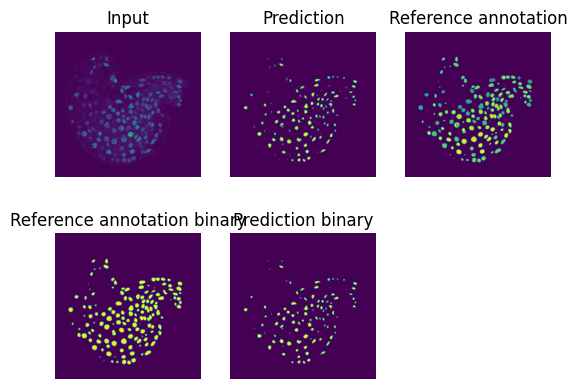

In [16]:
process(bmz_model, ome_zarr_uri, reference_annotations, z_slices=[170, 180])

It seems that noisy-fish is better at segmenting Arabidospsis ovules than loyal-squid, this makes sense because noisy-fish was trained precisely for this!